## 0. Importación de librerias y carga de datos

In [2]:
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd
from sklearn import datasets, model_selection, preprocessing, linear_model, metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.style.use('ggplot')

In [3]:
df_original = pd.read_csv('Data/202510_Laboratorio 2 - Agrupación_Customer_Data.csv ',sep=';', encoding='ISO-8859-1')
df=df_original.copy()

## 1. Preparación de datos

### 1.1 Perfilamiento de datos

In [5]:
df.shape

(8950, 18)

In [4]:
df

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.072200,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.480040,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.519020,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.570580,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.953340,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.586210,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.003840,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.587970,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.021630,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.705070,6994.688474,62041.61734,0.383186,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C18946,6095.221156,0.234346,27094.007820,35917.204380,3463.821376,11711.578890,0.469832,0.539477,0.828321,0.191030,75,101,17623.810280,23954.396950,34841.82989,0.866856,7
8946,C18947,12682.575820,0.686025,38433.618850,5293.541956,18924.799800,34444.867320,0.710331,0.276426,0.546059,0.935152,95,170,12433.814930,7375.625322,66726.37299,0.306600,10
8947,C18948,16464.311410,0.189136,4296.196384,32554.759640,11231.500430,15214.671560,0.424665,0.746010,0.690380,1.063788,51,151,3307.587117,22947.759220,54761.96221,0.129242,8
8948,C18949,15531.883780,0.117118,12219.325650,31795.971700,12390.432130,13856.393210,0.450670,0.805140,0.608737,1.058548,61,178,6148.232910,21369.503520,50368.30906,0.087448,8


El set de datos obtenido tiene 8950 filas y 18 columnas. Cada fila representa una tarjeta de un cliente. La tarjeta está descrita en terminos de los movimientos que el cliente de la empresa realiza con ella. Tenemos información de saldos, compras a plazo, puntuales y totales. Además hay información de pagos, avances en efectivo  y también se conoce el tiempo que la persona lleva siendo cliente de FinanzasAlpes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8950 non-null   object 
 1   SALDO                8950 non-null   float64
 2   F_SALDO              8950 non-null   float64
 3   COMPRAS              8950 non-null   float64
 4   COMPRAS_PUNTUALES    8950 non-null   float64
 5   COMPRAS_PLAZOS       8950 non-null   float64
 6   AVANCE_EFECTIVO      8950 non-null   float64
 7   F_COMPRAS            8950 non-null   float64
 8   F_COMPRAS_PUNTUALES  8950 non-null   float64
 9   F_COMPRAS_PLAZOS     8950 non-null   float64
 10  F_AVANCE_EFECTIVO    8950 non-null   float64
 11  P_AVANCE_EFECTIVO    8950 non-null   int64  
 12  P_COMPRAS            8950 non-null   int64  
 13  LÍMITE_CREDITO       8949 non-null   float64
 14  PAGOS                8950 non-null   float64
 15  PAGOS_MINIMOS        8637 non-null   f

In [37]:
for col in df.columns:
    print(df[col].value_counts)

<bound method IndexOpsMixin.value_counts of 0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C18946
8946    C18947
8947    C18948
8948    C18949
8949    C18950
Name: ID, Length: 8949, dtype: object>
<bound method IndexOpsMixin.value_counts of 0        5323.148883
1       12726.638120
2        4305.572068
3        4740.988511
4       13820.920640
            ...     
8945     6095.221156
8946    12682.575820
8947    16464.311410
8948    15531.883780
8949     5852.488566
Name: SALDO, Length: 8949, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       0.250693
1       0.791307
2       0.176531
3       0.178076
4       0.826914
          ...   
8945    0.234346
8946    0.686025
8947    0.189136
8948    0.117118
8949    0.166820
Name: F_SALDO, Length: 8949, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       26344.072200
1       37958.519020
2       28392.953340
3       27399.003840
4       42214.021630
         

No hay variables categoricas, todas son variables numericas de tipo int y float. La unica columna tipo object es ID.

### 1.2 Entendimiento de datos

In [6]:
df.head()

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


In [8]:
df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Las estadisticas sobre las variables numericas muestran que hay algunos clientes que no tienen saldo, por lo que tampoco han hehco compras, ni puntuales ni a plazos. También se puede ver que el minimo limite de credito de es 50 y el maximo es 30000. Por otro lado, en promedio el tiempo de los clientes usando los servicios de FinanzasAlpes es de 8 meses y el minimo de tiempo es 6, lo que en un periodo de un año representaria el 50% del tiempo.

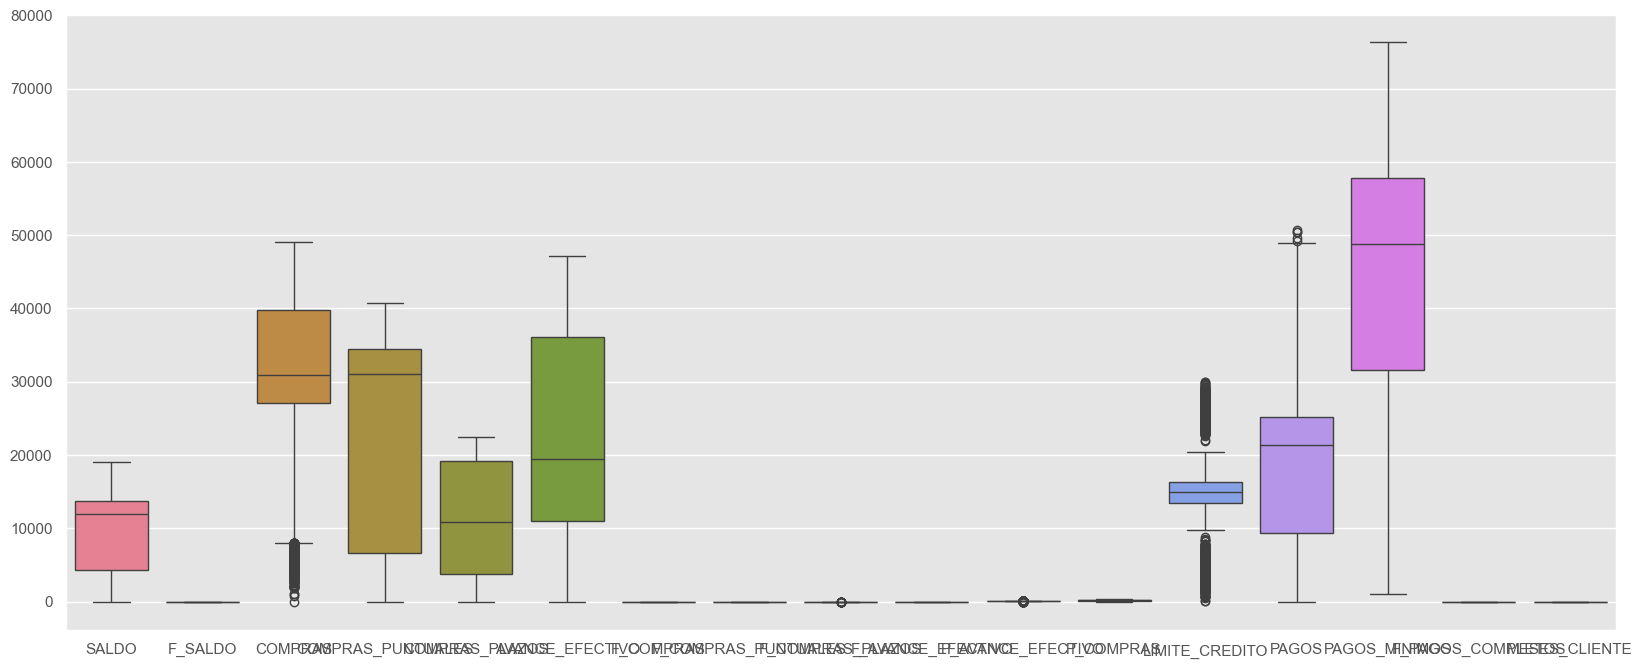

In [9]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

In [10]:
print(df.dtypes)

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object


No se toma en cuenta el ID para las correlaciones ya que es tipo object y además no consideramos que brinde información importante sombre el comportamiento de los clientes.

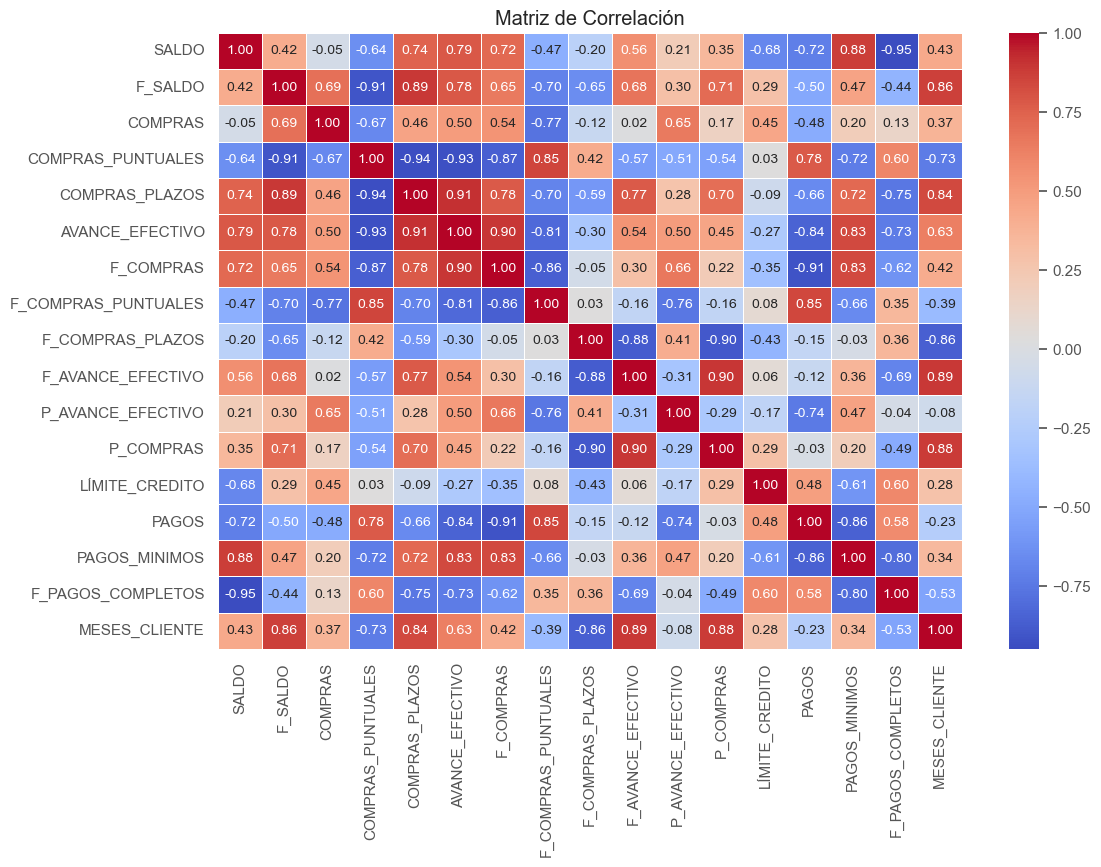

In [11]:
corr_matrix = df.select_dtypes(include=["number"]).corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


### En las correlaciones se pueden observar los siguientes comportamientos:

#### Comportamiento de saldo y pagos

1. Clientes con saldo alto → Compran más a plazos y usan más avances en efectivo
2. Clientes con saldo bajo → Compran más de forma puntual.
3. Quienes pagan el saldo completo → Tienen menor saldo y hacen menos pagos mínimos.

#### Patrón de compras

1. Compras puntuales vs. compras a plazos → Son opuestas. Los clientes tienden a elegir una u otra.
2. Los que compran a plazos → También usan avances en efectivo con más frecuencia.
3. Clientes con compras grandes → Suelen usar avances en efectivo y tener más tiempo con la entidad.

#### Uso de avances en efectivo

1. Clientes que hacen avances en efectivo → Compran a plazos, tienen más saldo y pagan menos.
2. Clientes que NO usan avances en efectivo → Suelen hacer compras puntuales y pagar más.

#### Antigüedad del cliente

1. Clientes más antiguos → Compran más a plazos, hacen avances en efectivo con frecuencia y gastan más en cada compra.
2. Clientes más nuevos → Compran más de forma puntual y a menor escala.

#### Basado en esta información se identificaron grupos potenciales , los cuales son:

1. Clientes que compran a plazos y usan avances en efectivo (saldo alto, pagan menos).
2. Clientes que compran puntual y pagan más (menos saldo, sin avances en efectivo).
3. Clientes antiguos con compras grandes (usan más crédito, gastan más).
4. Clientes nuevos con compras pequeñas (menos deuda, menos pagos mínimos).

### 1.2 Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.
En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación.

### 1.2.1 Completitud - Análisis de valores nulos o vacíos

In [ ]:
df.isnull().sum()
## preguntar a pipe

ID                     0
SALDO                  0
F_SALDO                0
COMPRAS                0
COMPRAS_PUNTUALES      0
COMPRAS_PLAZOS         0
AVANCE_EFECTIVO        0
F_COMPRAS              0
F_COMPRAS_PUNTUALES    0
F_COMPRAS_PLAZOS       0
F_AVANCE_EFECTIVO      0
P_AVANCE_EFECTIVO      0
P_COMPRAS              0
LÍMITE_CREDITO         0
PAGOS                  0
PAGOS_MINIMOS          0
F_PAGOS_COMPLETOS      0
MESES_CLIENTE          0
Cluster                0
dtype: int64

In [12]:
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

PAGOS_MINIMOS          0.034972
LÍMITE_CREDITO         0.000112
ID                     0.000000
SALDO                  0.000000
F_PAGOS_COMPLETOS      0.000000
PAGOS                  0.000000
P_COMPRAS              0.000000
P_AVANCE_EFECTIVO      0.000000
F_AVANCE_EFECTIVO      0.000000
F_COMPRAS_PLAZOS       0.000000
F_COMPRAS_PUNTUALES    0.000000
F_COMPRAS              0.000000
AVANCE_EFECTIVO        0.000000
COMPRAS_PLAZOS         0.000000
COMPRAS_PUNTUALES      0.000000
COMPRAS                0.000000
F_SALDO                0.000000
MESES_CLIENTE          0.000000
dtype: float64

Se pueden observar ciertas filas con nulos , entonces vamos a revisarlo ya que esto puede afectar la agrupación en modelos como K-Means

In [13]:
df[df.isnull().any(axis=1)]


,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2,C10003,4305.572068,0.176531,28392.953340,36009.470090,2873.383232,14294.18503,0.419764,0.523662,0.899912,0.207049,72,81,15515.586210,27111.360490,NaN,0.829074,6
31,C10032,3310.590886,0.599920,31427.680340,29692.273750,9395.804625,12119.27183,0.241004,0.759244,0.192674,1.353220,28,307,27471.470630,42788.566250,NaN,0.748458,11
45,C10046,14893.094970,0.754369,43348.871500,7196.968679,20440.098640,36786.55161,0.758416,0.211381,0.501564,0.828791,89,183,16223.672510,8064.315833,NaN,0.377104,10
53,C10054,13030.318170,0.767215,41541.292300,4084.981848,19163.859250,37746.28868,0.854852,0.244613,0.493249,1.065783,97,244,11722.581050,12306.438970,NaN,0.433215,10
78,C10079,3514.910807,0.181879,28067.685300,35318.373000,2660.913729,12034.56947,0.451773,0.494646,0.791138,0.143462,80,65,17314.285730,28487.355700,NaN,0.866448,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,C18923,2712.167972,0.282046,28536.331890,35580.354640,4425.331588,18613.02233,0.359371,0.575407,0.860808,0.408806,82,72,14918.052730,21416.015690,NaN,0.920035,6
8929,C18930,6039.746284,0.223305,32230.694630,34187.764740,3450.289051,10161.10731,0.467539,0.569357,0.810294,0.124760,80,97,13346.607000,26226.982450,NaN,0.816095,6
8934,C18935,3907.309029,0.229597,30254.878710,31994.886640,3183.752172,12765.06700,0.406941,0.659441,0.844801,0.276053,74,84,16760.975030,24010.894490,NaN,0.858690,6
8938,C18939,16551.038470,0.099458,8163.267932,33988.691350,10175.408990,16704.32565,0.603985,0.656120,0.750198,1.016616,46,146,1852.802394,17727.359190,NaN,0.165054,8


Cómo límite crédito tiene muy pocos nulos(0.01%) se decidió eliminar estas filas

In [14]:
df = df.dropna(subset=['LÍMITE_CREDITO']).copy()

También se decidió rellenar PAGOS_MINIMOS con la mediana para evitar sesgos por outliers

In [15]:
df['PAGOS_MINIMOS'] = df['PAGOS_MINIMOS'].fillna(df['PAGOS_MINIMOS'].median())

Volvemos a revisar la cantidad de nulos

In [16]:
df[df.isnull().any(axis=1)]

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE


### 1.2.2 Unicidad

In [17]:
df.duplicated(keep = False).sum()

0

Hay 0 duplicados , entonces no se hace nada más con respecto a la unicidad

### 1.2.3 Consistencia

Revisión de valores negativos en columnas relevantes

In [18]:
df.PAGOS.value_counts()

PAGOS
21337.027460    1
37994.250000    1
24779.048080    1
7076.890278     1
6738.704191     1
               ..
27965.446250    1
41725.197760    1
11101.077330    1
25412.125900    1
24703.925210    1
Name: count, Length: 8949, dtype: int64

In [19]:
print(df.describe()) 


              SALDO      F_SALDO       COMPRAS  COMPRAS_PUNTUALES  \
count   8949.000000  8949.000000   8949.000000        8949.000000   
mean    9382.834407     0.459235  30525.813963       22911.925086   
std     5118.225213     0.283000  11042.026468       13573.678604   
min        0.000000     0.000000      0.000000           0.000000   
25%     4275.010013     0.188477  27106.472380        6697.909592   
50%    12008.971240     0.306857  30934.348710       31007.815260   
75%    13740.607830     0.756063  39825.766500       34494.807700   
max    19043.138560     1.000000  49039.570000       40761.250000   

       COMPRAS_PLAZOS  AVANCE_EFECTIVO    F_COMPRAS  F_COMPRAS_PUNTUALES  \
count     8949.000000      8949.000000  8949.000000          8949.000000   
mean     11408.535114     22575.147465     0.559820             0.478039   
std       7087.204157     12594.004702     0.214065             0.221885   
min          0.000000         0.000000     0.000000             0.000000  

In [20]:
print(df[df['PAGOS_MINIMOS'] > df['PAGOS']])
#No estoy seguro si esto tiene sentido


          ID         SALDO   F_SALDO       COMPRAS  COMPRAS_PUNTUALES  \
0     C10001   5323.148883  0.250693  26344.072200       38237.442520   
1     C10002  12726.638120  0.791307  37958.519020        5690.742440   
2     C10003   4305.572068  0.176531  28392.953340       36009.470090   
3     C10004   4740.988511  0.178076  27399.003840       38246.863490   
4     C10005  13820.920640  0.826914  42214.021630        7341.007821   
...      ...           ...       ...           ...                ...   
8945  C18946   6095.221156  0.234346  27094.007820       35917.204380   
8946  C18947  12682.575820  0.686025  38433.618850        5293.541956   
8947  C18948  16464.311410  0.189136   4296.196384       32554.759640   
8948  C18949  15531.883780  0.117118  12219.325650       31795.971700   
8949  C18950   5852.488566  0.166820  32480.936200       32368.357730   

      COMPRAS_PLAZOS  AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  \
0        3727.113162     15708.239680   0.496536  

### 1.2.4 Validez

In [21]:
numerical_columns = df.select_dtypes(include=['number']).columns  # Selecciona solo columnas numéricas
invalid_values = df[(df[numerical_columns] < 0).any(axis=1)]  # Encuentra filas con valores negativos

print(invalid_values)


Empty DataFrame
Columns: [ID, SALDO, F_SALDO, COMPRAS, COMPRAS_PUNTUALES, COMPRAS_PLAZOS, AVANCE_EFECTIVO, F_COMPRAS, F_COMPRAS_PUNTUALES, F_COMPRAS_PLAZOS, F_AVANCE_EFECTIVO, P_AVANCE_EFECTIVO, P_COMPRAS, LÍMITE_CREDITO, PAGOS, PAGOS_MINIMOS, F_PAGOS_COMPLETOS, MESES_CLIENTE]
Index: []


### 1.3 Identificación Variables a usar

Para agrupar clientes de forma efectiva, seleccionaremos variables que representen su comportamiento financiero:

1. SALDO → Representa el dinero disponible.
2. COMPRAS → Total de compras realizadas.
3. COMPRAS_PUNTUALES → Pagos puntuales reflejan clientes responsables.
4. COMPRAS_PLAZOS → Indica qué tanto usan crédito.
5. AVANCE_EFECTIVO → Uso de avances en efectivo, reflejo de necesidad de liquidez.
6. LÍMITE_CREDITO → Capacidad máxima de crédito otorgado.
7. PAGOS → Total de pagos realizados.
8. PAGOS_MINIMOS → Cantidad de pagos mínimos efectuados.
9. F_COMPRAS → Frecuencia de compras.
10. F_COMPRAS_PUNTUALES → Frecuencia de compras puntuales.
11. F_COMPRAS_PLAZOS → Frecuencia de compras a plazos.
12. F_AVANCE_EFECTIVO → Frecuencia de avances en efectivo.
13. F_PAGOS_COMPLETOS → Frecuencia de pagos completos.

In [22]:
features = ["SALDO", "COMPRAS", "COMPRAS_PUNTUALES", "COMPRAS_PLAZOS", 
            "AVANCE_EFECTIVO", "LÍMITE_CREDITO", "PAGOS", "PAGOS_MINIMOS",
            "F_COMPRAS", "F_COMPRAS_PUNTUALES", "F_COMPRAS_PLAZOS", 
            "F_AVANCE_EFECTIVO", "F_PAGOS_COMPLETOS"]

## 2. Modelamiento

#### 2.1 Evaluación de rendimiento de algunos algoritmos

Evaluamos Algunos algoritmos conocidos como K-Means , DBSCAN , GMM y Agglomerative Clustering para determinar cual tiene las mejores métricas

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
df_numeric = df.select_dtypes(include=['number'])  
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)
def evaluate_clustering(model, X, model_name):
    labels = model.fit_predict(X)
    if len(set(labels)) > 1:  
        silhouette = silhouette_score(X, labels)
        db_index = davies_bouldin_score(X, labels)
    else:
        silhouette, db_index = -1, np.inf 
    print(f"\n{model_name} - Silhouette Score: {silhouette:.4f}, Davies-Bouldin Index: {db_index:.4f}")
    return labels
kmeans = KMeans(n_clusters=3, random_state=42)
evaluate_clustering(kmeans, X, "K-Means")
dbscan = DBSCAN(eps=0.5, min_samples=5)
evaluate_clustering(dbscan, X, "DBSCAN")
gmm = GaussianMixture(n_components=3, random_state=42)
evaluate_clustering(gmm, X, "GMM")
agglo = AgglomerativeClustering(n_clusters=3)
evaluate_clustering(agglo, X, "Agglomerative Clustering")


K-Means - Silhouette Score: 0.6562, Davies-Bouldin Index: 0.5548

DBSCAN - Silhouette Score: -0.5719, Davies-Bouldin Index: 1.2369

GMM - Silhouette Score: 0.6562, Davies-Bouldin Index: 0.5548

Agglomerative Clustering - Silhouette Score: 0.6562, Davies-Bouldin Index: 0.5548


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

Por otro lado , se hace la prueba con algoritmos ménos conocidos como Spectral Clustering , OPTICS , Birch y Mean Shift a ver si se obtienen mejores resultados

In [24]:
from sklearn.cluster import SpectralClustering, OPTICS, Birch, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score

df_numeric = df.select_dtypes(include=['number']) 
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)  
algorithms = {
    "Spectral Clustering": SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans'),
    "OPTICS": OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05),
    "Birch": Birch(n_clusters=4),
    "Mean Shift": MeanShift()
}

for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X)
        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else np.inf
        print(f"{name} - Silhouette Score: {silhouette:.4f}, Davies-Bouldin Index: {davies_bouldin:.4f}")
    except Exception as e:
        print(f"{name} falló: {e}")

c:\Users\jafie\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering - Silhouette Score: 0.5556, Davies-Bouldin Index: 0.6249
OPTICS - Silhouette Score: 0.7311, Davies-Bouldin Index: 0.5818
Birch - Silhouette Score: 0.7694, Davies-Bouldin Index: 0.3282
Mean Shift - Silhouette Score: 0.7694, Davies-Bouldin Index: 0.3282


#### 2.2 K - Means

#### 2.3 Mean Shift

La elección de Mean Shift como algoritmo de clustering se basa en las siguientes métricas y consideraciones:

1. Mejor Silhouette Score → 0.7694 (indica buena separación entre clusters).

2. Menor Davies-Bouldin Index → 0.3282 (clusters más compactos y menos solapados).

3. Mean Shift no requiere definir el número de clusters a desde antes, lo que es útil en problemas donde no se conoce el número óptimo de grupos.

In [25]:
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mean_shift = MeanShift()
clusters = mean_shift.fit_predict(X_scaled)

df["Cluster"] = clusters

cluster_counts = df["Cluster"].value_counts()

print("Número de clientes por cluster:")
print(cluster_counts)

df.to_csv("clientes_segmentados_mean_shift.csv", index=False)

Número de clientes por cluster:
Cluster
0    3481
1    3283
2    1247
3     938
Name: count, dtype: int64


## 3. Validación Cuantitativa

## 4. Validación Cualitativa